# i. Introduction
Marchelly Gideon Tambunan

# ii. Import Library

In [61]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay
import pickle
import joblib
from feature_engine.transformation import BoxCoxTransformer
import warnings
warnings.simplefilter("ignore")

# iii. SQL Query

SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_004_hck.heart-failure` 

# iv. Data Loading

In [2]:
df = pd.read_csv('h8dsft_P1G3_Marchelly_Gideon.csv',na_values=[" ", "-", "?" ,"n/a", "na", "--"," ?"])
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


In [3]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
6,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
7,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
8,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
9,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1


In [4]:
df.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,64.0,0,1610,0,60,0,242000.00,1.0,137,1,0,113,0
290,62.0,0,30,1,60,1,244000.00,0.9,139,1,0,117,0
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
293,60.0,1,95,0,60,0,337000.00,1.0,138,1,1,146,0
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [8]:
df.duplicated().sum()

0

In [9]:
data = df.copy()

# v. Exploratory Data Analysis(EDA)

Sebelum kita mulai melakukan eksplorasi data agar memahami data yang kita dapat, kita perlu mengecek korelasi antar kolom terhadap kolom DEATH_EVENT.

In [62]:
data.phik_matrix().loc['DEATH_EVENT'].sort_values(ascending=False)

interval columns not set, guessing: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


DEATH_EVENT                 1.000000
time                        0.772675
ejection_fraction           0.515675
age                         0.356298
serum_creatinine            0.332330
serum_sodium                0.214335
creatinine_phosphokinase    0.101787
high_blood_pressure         0.067031
anaemia                     0.018687
diabetes                    0.000000
platelets                   0.000000
sex                         0.000000
smoking                     0.000000
Name: DEATH_EVENT, dtype: float64

dari hasil diatas dapat diketahui beberapa kolom memiliki korelasi yang cukup baik. jadi kita akan menggunakan nilai korelasi > 2. selain itu, saya juga akan menambahkan kolom yang menurut saya memiliki hubungan kuat untuk memprediksi kematian seseorang

In [11]:
data_clean = data[['age', 'ejection_fraction', 'serum_creatinine','serum_sodium','time','anaemia','diabetes','smoking','DEATH_EVENT']]
data_clean

,age,ejection_fraction,serum_creatinine,serum_sodium,time,anaemia,diabetes,smoking,DEATH_EVENT
0,42.0,15,1.3,136,65,1,1,0,1
1,46.0,17,2.1,124,100,0,1,0,1
2,65.0,20,2.7,116,8,1,1,0,1
3,53.0,20,1.4,139,43,1,0,0,1
4,50.0,20,1.0,134,186,1,1,0,0
...,...,...,...,...,...,...,...,...,...
294,63.0,60,1.2,145,147,1,1,0,0
295,45.0,60,1.0,136,186,0,1,0,0
296,70.0,60,0.9,138,186,0,0,0,0
297,53.0,60,1.0,139,215,1,0,0,0


sekarang mari kita lihat distribusi dari data numerik

0.4230619067286355

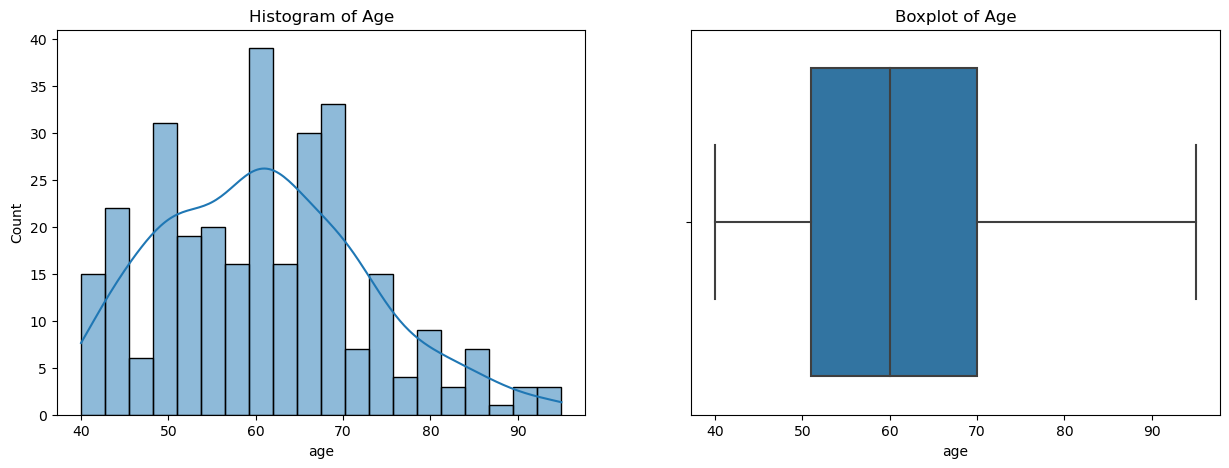

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data_clean['age'], bins=20,kde=True)
plt.title('Histogram of Age')

plt.subplot(1,2,2)
sns.boxplot(data_clean['age'])
plt.title('Boxplot of Age');

data_clean['age'].skew()

0.5553827516973213

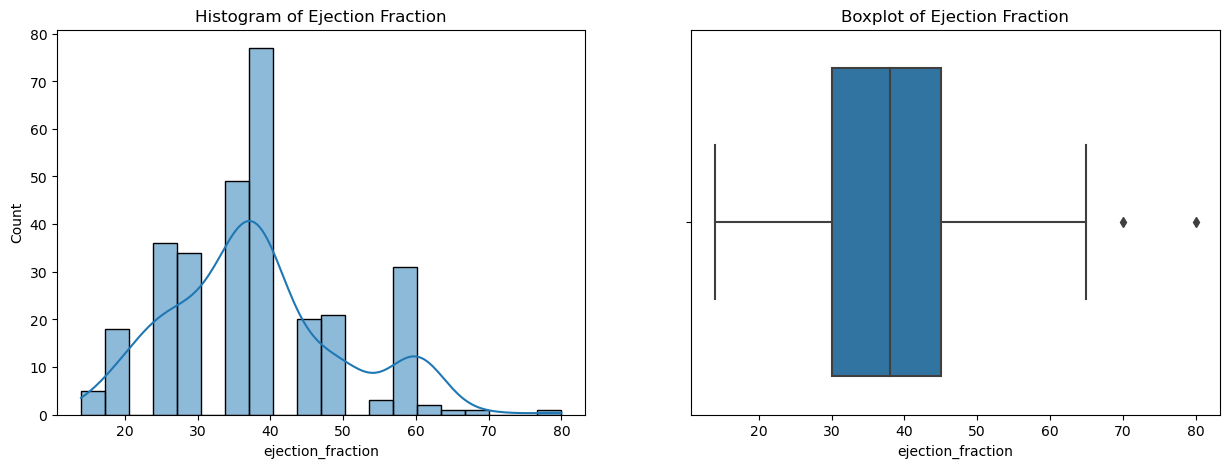

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data_clean['ejection_fraction'], bins=20,kde=True)
plt.title('Histogram of Ejection Fraction')

plt.subplot(1,2,2)
sns.boxplot(data_clean['ejection_fraction'])
plt.title('Boxplot of Ejection Fraction');

data_clean['ejection_fraction'].skew()

4.455995882049029

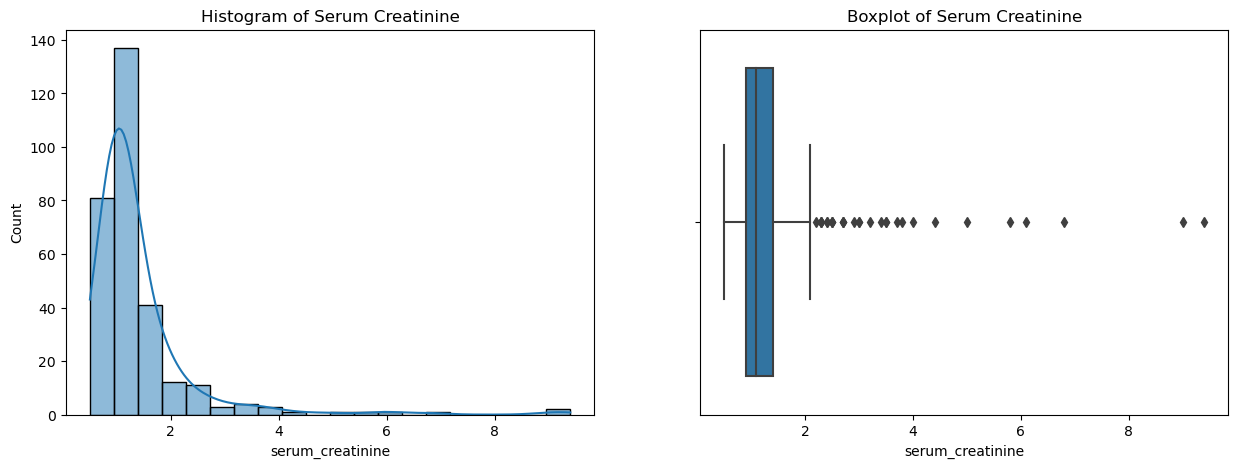

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data_clean['serum_creatinine'], bins=20,kde=True)
plt.title('Histogram of Serum Creatinine')

plt.subplot(1,2,2)
sns.boxplot(data_clean['serum_creatinine'])
plt.title('Boxplot of Serum Creatinine');

data_clean['serum_creatinine'].skew()

-1.0481360160574988

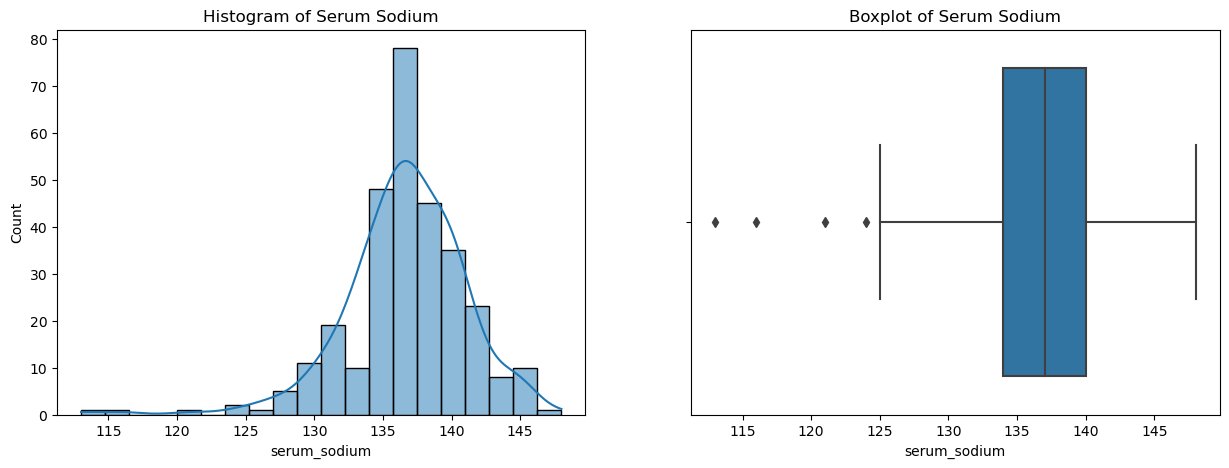

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data_clean['serum_sodium'], bins=20,kde=True)
plt.title('Histogram of Serum Sodium')

plt.subplot(1,2,2)
sns.boxplot(data_clean['serum_sodium'])
plt.title('Boxplot of Serum Sodium');

data_clean['serum_sodium'].skew()

0.12780264559841178

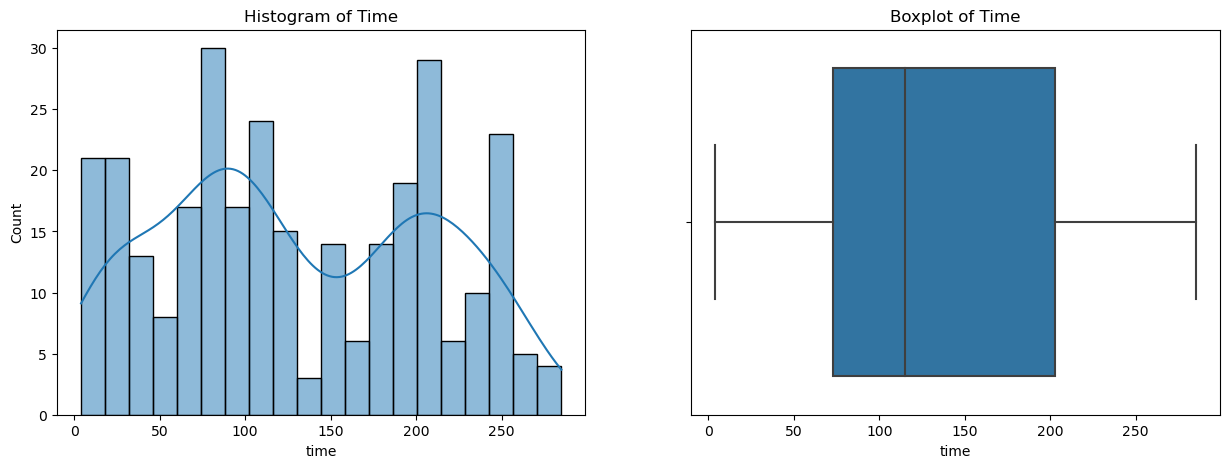

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data_clean['time'], bins=20,kde=True)
plt.title('Histogram of Time')

plt.subplot(1,2,2)
sns.boxplot(data_clean['time'])
plt.title('Boxplot of Time');

data_clean['time'].skew()

dari hasil distribusi diatas, terlihat bahwa nilai skewness pada setiap kolom bermacam-macam, dan ada beberapa kolom yang memiliki outlier. nanti kita akan handling outlier pada saatnya.

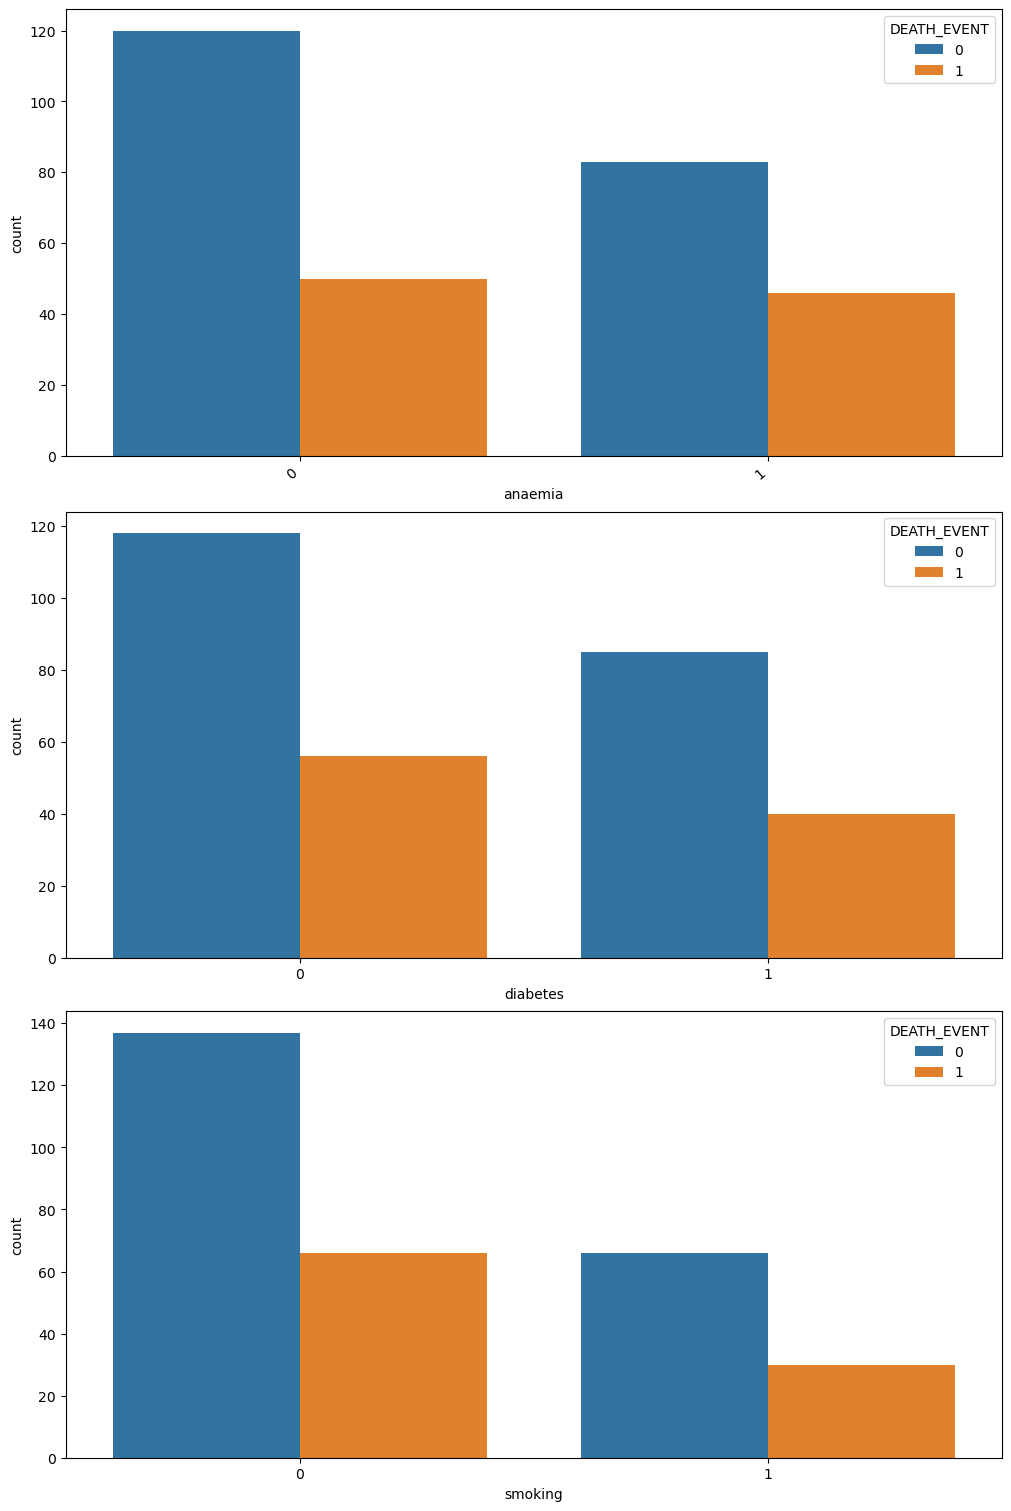

In [67]:
fig, axes = plt.subplots(nrows=3,ncols=1,figsize=(10, 15), constrained_layout=True)

for index, column in enumerate(['anaemia', 'diabetes', 'smoking']):
    sns.countplot(data=df, x=column, hue="DEATH_EVENT", ax=axes[index])
    if column in ['anaemia']:
        axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=40, ha="right")

del fig, axes, index, column

hasil visualisasi kolom diatas, terlihat bahwa nilai 0 lebih banyak pada setiap kolom nya.

# vi. Features Preprocessing

In [17]:
# memilih fitur
x = data_clean.drop('DEATH_EVENT', axis = 1)
y = data_clean['DEATH_EVENT']
x

,age,ejection_fraction,serum_creatinine,serum_sodium,time,anaemia,diabetes,smoking
0,42.0,15,1.3,136,65,1,1,0
1,46.0,17,2.1,124,100,0,1,0
2,65.0,20,2.7,116,8,1,1,0
3,53.0,20,1.4,139,43,1,0,0
4,50.0,20,1.0,134,186,1,1,0
...,...,...,...,...,...,...,...,...
294,63.0,60,1.2,145,147,1,1,0
295,45.0,60,1.0,136,186,0,1,0
296,70.0,60,0.9,138,186,0,0,0
297,53.0,60,1.0,139,215,1,0,0


### Train Test Split

In [18]:
# train test split
x_train,x_test, y_train,y_test= train_test_split(x,y, test_size=0.1, random_state=2)
print(f'dimensi x_train: {x_train.shape}')
print(f'dimensi x_test: {x_test.shape}')
print(f'dimensi y_train: {y_train.shape}')
print(f'dimensi y_train: {y_test.shape}')

dimensi x_train: (269, 8)
dimensi x_test: (30, 8)
dimensi y_train: (269,)
dimensi y_train: (30,)


In [56]:
num_col = ['age', 'ejection_fraction', 'serum_creatinine','serum_sodium','time']
cat_col = ['anaemia','diabetes', 'smoking']

print(f'Number of numerical columns: {len(num_col)}')
print(f'Numerical columns: {num_col}')
print(f'Number of categorical columns: {len(cat_col)}')
print(f'Categorical columns: {cat_col}')


x_train_num = x_train[num_col]
x_train_cat = x_train[cat_col]

x_test_num = x_test[num_col]
x_test_cat = x_test[cat_col]

Number of numerical columns: 5
Numerical columns: ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']
Number of categorical columns: 3
Categorical columns: ['anaemia', 'diabetes', 'smoking']


### Handling Outlier

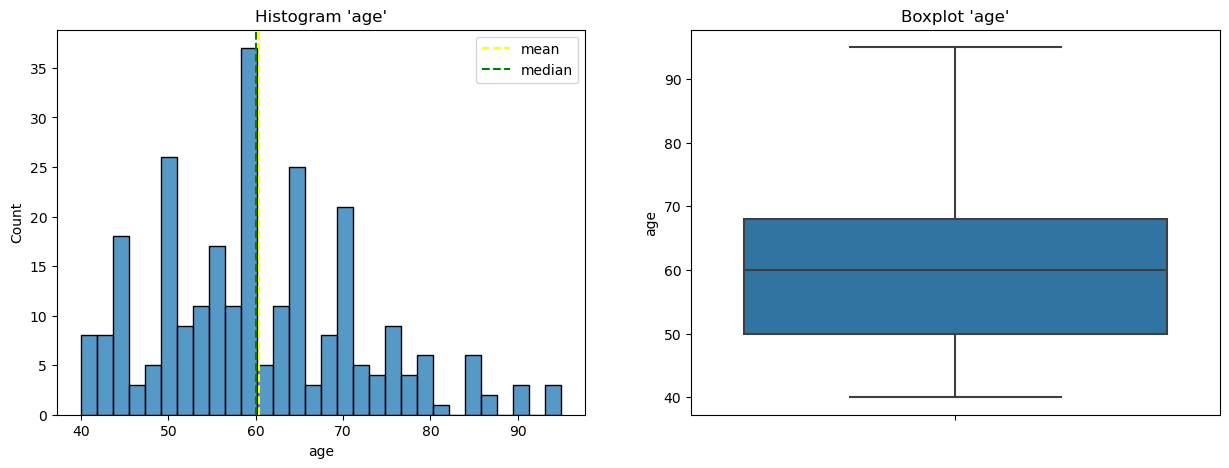

age Kurtosis: 0.005961679591736324
age Skewness: 0.5051008394955014
Columns 'age' Right Moderately Skewed


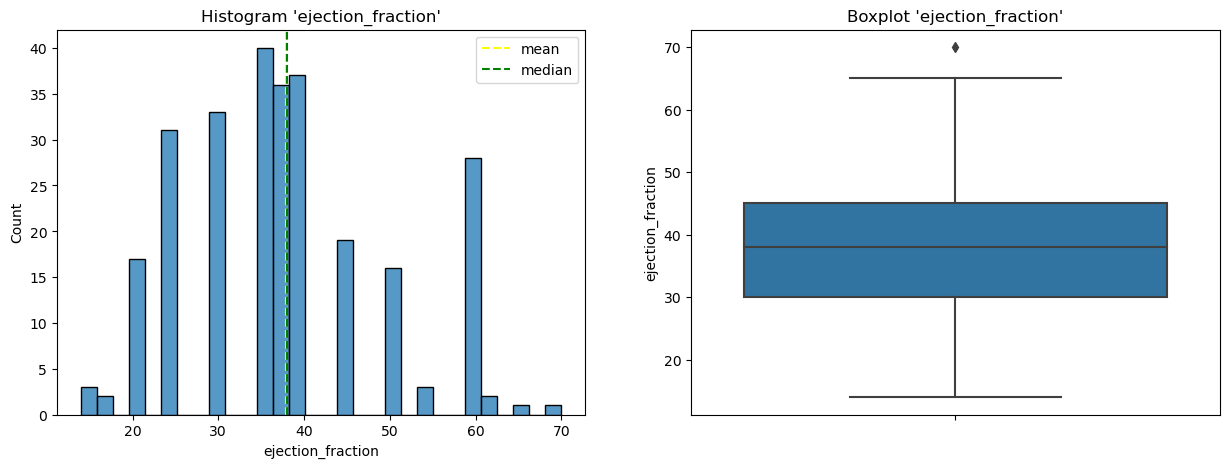

ejection_fraction Kurtosis: -0.22424432987175713
ejection_fraction Skewness: 0.4707844327265652
Columns 'ejection_fraction' Normal Distribution


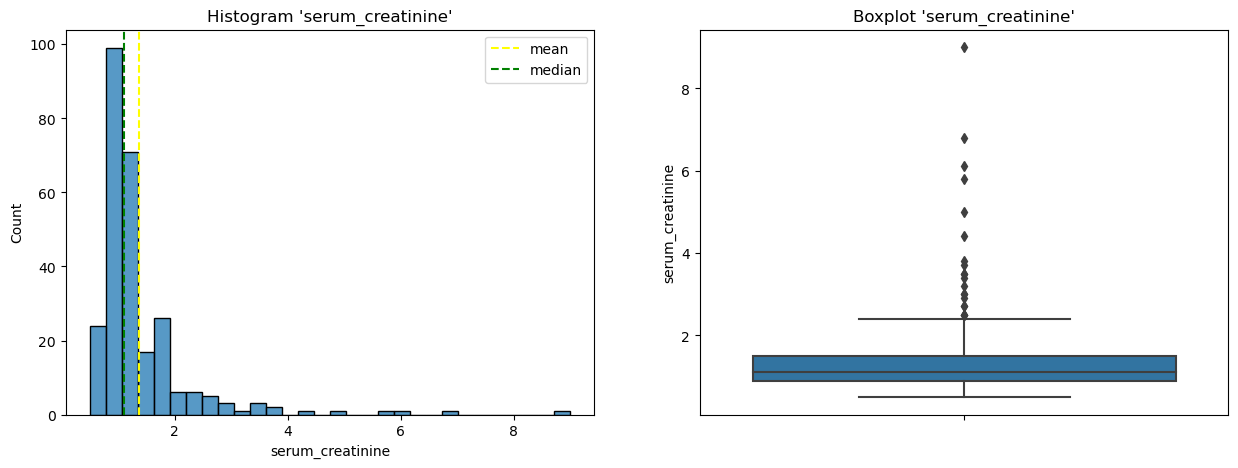

serum_creatinine Kurtosis: 22.72468077564215
serum_creatinine Skewness: 4.094303336395578
Columns 'serum_creatinine' Right Highly Skewed


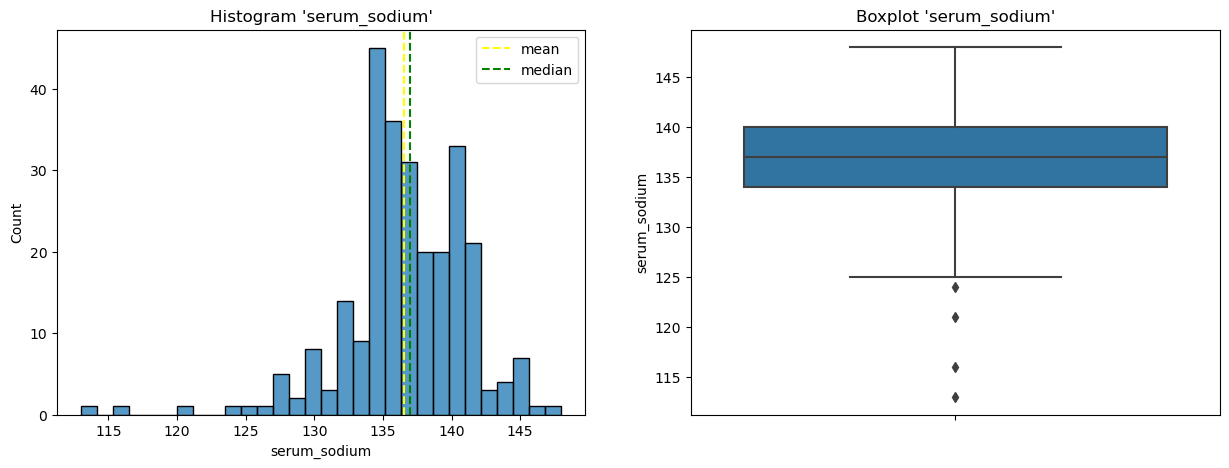

serum_sodium Kurtosis: 4.226850677591626
serum_sodium Skewness: -1.114626751638395
Columns 'serum_sodium' Left Highly Skewed


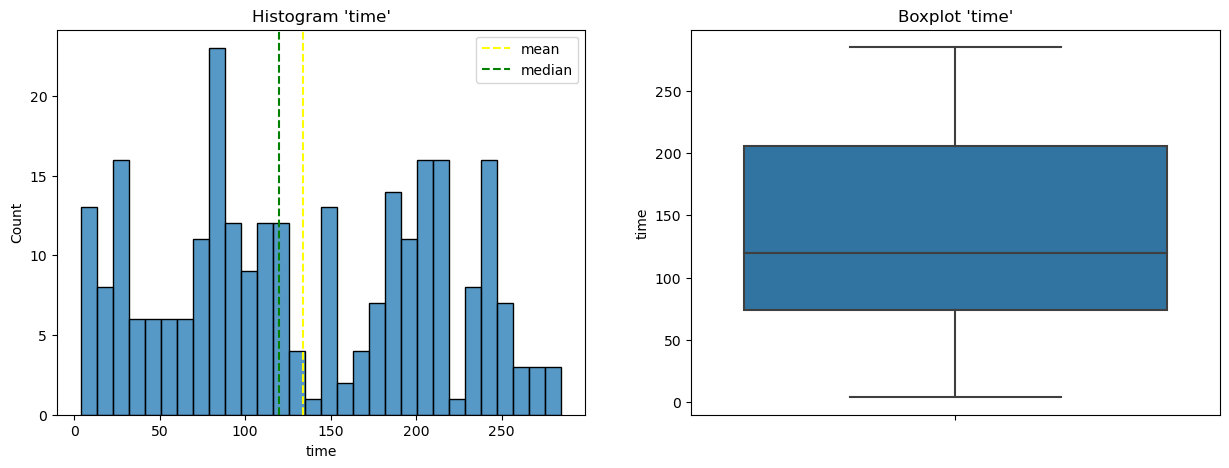

time Kurtosis: -1.2317492454351378
time Skewness: 0.04900018424417549
Columns 'time' Normal Distribution


In [20]:
def dist(data_clean, num_col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(data_clean[num_col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{num_col}'")
    axes[0].axvline(data_clean[num_col].mean(), color = 'yellow', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(data_clean[num_col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=data_clean[num_col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{num_col}'")
    
    plt.show()
    
    # skewness
    print(data_clean[num_col].name + ' Kurtosis: ' + str(data_clean[num_col].kurt()))
    print(data_clean[num_col].name + ' Skewness: ' + str(data_clean[num_col].skew()))
    if -0.5 <= data_clean[num_col].skew() <= 0.5:
        print("Columns '{}' Normal Distribution".format(num_col))
    elif data_clean[num_col].skew() > 0.5 and data_clean[num_col].skew() <= 1 :
        print("Columns '{}' Right Moderately Skewed".format(num_col))
    elif data_clean[num_col].skew() > 1:
        print("Columns '{}' Right Highly Skewed".format(num_col))
    elif data_clean[num_col].skew() < -0.5 and data_clean[num_col].skew() >= -1 :
        print("Columns '{}' Left Moderately Skewed".format(num_col))
    elif data_clean[num_col].skew() < -1:
        print("Columns '{}' Left Highly Skewed".format(num_col))

num = x_train[num_col]

for num_col in num.columns:
    dist(x_train, num_col)

setelah melihat hasil distribusi dan boxplot, kita putuskan untuk tidak melakukan apapun pada outliers tersebut karena data yang kita miliki terbatas pada kolom yang ada outlier

In [21]:
box = BoxCoxTransformer(variables = ['ejection_fraction', 'serum_creatinine', 'serum_sodium'])

# Fit and transforming 4 columns inside train and test data
box.fit(x_train)
x_train = box.transform(x_train)
x_test = box.transform(x_test)

Setelah melakukan handling outliers menggunakan boxcox, selanjutnya kita akan cek outlier untuk dilakukan handling

### Handling Missing Values

In [22]:
x_train.isnull().sum()

age                  0
ejection_fraction    0
serum_creatinine     0
serum_sodium         0
time                 0
anaemia              0
diabetes             0
smoking              0
dtype: int64

In [23]:
x_test.isnull().sum()

age                  0
ejection_fraction    0
serum_creatinine     0
serum_sodium         0
time                 0
anaemia              0
diabetes             0
smoking              0
dtype: int64

In [24]:
y_train.isnull().sum()

0

In [25]:
y_test.isnull().sum()

0

### Features Scaling

Pada langkah ini kita akan melakukan scaling pada kolom numerik menggunakan metode minmax scaler. kita menggunakan metode tersebut karena nilai skewness pada beberapa kolom masih cukup tinggi dan masih ada outlier pada boxplot yang telah ditampilkan

In [26]:
# Scaling numerical features inside data train and test

scaler = StandardScaler() 
scaler.fit(x_train_num) 

x_train_num_scaled = scaler.transform(x_train_num)
x_test_num_scaled = scaler.transform(x_test_num)  

x_train_num_scaled

array([[-0.03498639, -0.67714442,  0.97234616,  0.10235099, -1.33464285],
       [-1.72563587,  0.18206241, -0.60478   ,  0.99771411,  0.68376191],
       [-0.88031113,  0.18206241, -0.70992175, -1.46453447,  0.52948894],
       ...,
       [-0.79577866,  0.18206241, -0.49963826, -0.56917135,  1.41655855],
       [ 0.38767598, -0.67714442,  0.23635395, -0.12148979, -1.46320366],
       [-0.03498639, -0.67714442, -0.39449651,  0.10235099,  1.42941463]])

### Features Encoding

Karena kita tidak memiliki kolom untuk dilakukan encoding. jadi kita akan melewati langkah encoding

### Concat Between Numerical and Categorical Column

In [27]:
# Concate Columns

x_train_final = np.concatenate([x_train_num_scaled,x_train_cat], axis=1)
x_test_final = np.concatenate([x_test_num_scaled,x_test_cat], axis=1)

x_train_final

array([[-0.03498639, -0.67714442,  0.97234616, ...,  0.        ,
         1.        ,  0.        ],
       [-1.72563587,  0.18206241, -0.60478   , ...,  1.        ,
         0.        ,  0.        ],
       [-0.88031113,  0.18206241, -0.70992175, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.79577866,  0.18206241, -0.49963826, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.38767598, -0.67714442,  0.23635395, ...,  1.        ,
         1.        ,  0.        ],
       [-0.03498639, -0.67714442, -0.39449651, ...,  1.        ,
         1.        ,  1.        ]])

In [31]:
x_train_final_df = pd.DataFrame(x_train_final, columns=num_col+cat_col)
x_test_final_df = pd.DataFrame(x_test_final, columns=num_col+cat_col)
x_train_final_df


,age,ejection_fraction,serum_creatinine,serum_sodium,time,anaemia,diabetes,smoking
0,-0.034986,-0.677144,0.972346,0.102351,-1.334643,0.0,1.0,0.0
1,-1.725636,0.182062,-0.604780,0.997714,0.683762,1.0,0.0,0.0
2,-0.880311,0.182062,-0.709922,-1.464534,0.529489,1.0,1.0,0.0
3,1.233001,0.182062,-0.205241,0.102351,-0.344725,0.0,0.0,0.0
4,-1.556571,1.900476,-0.205241,0.102351,-0.666127,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
264,-1.725636,0.611666,-0.499638,0.773873,0.516633,0.0,0.0,0.0
265,-0.880311,-0.677144,-0.499638,-1.016853,-0.319012,0.0,1.0,0.0
266,-0.795779,0.182062,-0.499638,-0.569171,1.416559,0.0,1.0,0.0
267,0.387676,-0.677144,0.236354,-0.121490,-1.463204,1.0,1.0,0.0


### Checking VIF

mari kita lihat apakah ada multicolinearity pada kolom-kolom tersebut

In [32]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns.to_list()
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [33]:
calc_vif(x_train_final_df)

,variables,VIF
0,age,1.076416
1,ejection_fraction,1.054097
2,serum_creatinine,1.066587
3,serum_sodium,1.093625
4,time,1.078358
5,anaemia,1.308156
6,diabetes,1.286648
7,smoking,1.147628


dari hasil diatas terlihat bahwa tidak ada multicolinearity diantara kolom tersebut

### Handling Imbalance

pada visualisasi terlihat bahwa target memiliki data imbalance jadi kita akan melihat berapa banyak perbedaannya.

In [34]:
y_train.value_counts()

0    183
1     86
Name: DEATH_EVENT, dtype: int64

terlihat bahwa lebih dari 50% perbedaan pada setiap label nya. jadi kita akan handling menggunakan SMOTE

In [35]:
smote = SMOTE(k_neighbors=5, random_state=69,sampling_strategy='minority')
x_train_balanced, y_train_balanced = smote.fit_resample(x_train_final, y_train)
y_train_balanced.value_counts()

0    183
1    183
Name: DEATH_EVENT, dtype: int64

data sudah seimbang, mari kita lihat total datanya

In [36]:
x_train_balanced.shape

(366, 8)

# vii. Model Definition

In [37]:
# Defining Random Forest Classifier Model
rf = RandomForestClassifier(random_state=77)

# Defining AdaBoost Classifier Model
ada = AdaBoostClassifier(n_estimators=10)

Model yang akan digunakan pada data ini antara lain:

- Random Forest
- Ada Boosting Classifier

# viii. Model Training with Hyperparameter Tuning

### Random Forest Classifier

In [38]:
from scipy.stats import randint
param_dist = {'n_estimators': randint(10, 100),
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [None, 5, 10, 15, 20],
              'min_samples_split': randint(2, 10),
              'min_samples_leaf': randint(1, 5)}
param_dist

{'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x21b0d0a4f40>,
 'max_features': ['sqrt', 'log2', None],
 'max_depth': [None, 5, 10, 15, 20],
 'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x21b0d0d8d90>,
 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x21b0d08d2b0>}

In [39]:
random_search = RandomizedSearchCV(rf, 
                                   param_distributions=param_dist, 
                                   n_iter=10, 
                                   cv=5, 
                                   random_state=42)
random_search.fit(x_train_balanced, y_train_balanced)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=77),
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021B0D08D2B0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021B0D0D8D90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021B0D0A4F40>},
                   random_state=42)

In [40]:
# Get Best Hyperparameters

random_search.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 81}

In [41]:
# Get Best Estimator

rf_random_best = random_search.best_estimator_
rf_random_best

RandomForestClassifier(max_depth=15, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=4, n_estimators=81, random_state=77)

### Ada Boost Classifier

In [42]:
# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Perform a grid search with 5-fold cross-validation
grid_search = GridSearchCV(ada, param_grid=param_grid, cv=5)
grid_search.fit(x_train_balanced, y_train_balanced)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(n_estimators=10),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]})

In [43]:
grid_search.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}

In [44]:
ada_best = grid_search.best_estimator_
ada_best

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

# ix. Model Evaluation

### Random Forest Classification

f1 Score - Train Set   :  0.9595687331536388 

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       183
           1       0.95      0.97      0.96       183

    accuracy                           0.96       366
   macro avg       0.96      0.96      0.96       366
weighted avg       0.96      0.96      0.96       366
 

Confusion Matrix      : 


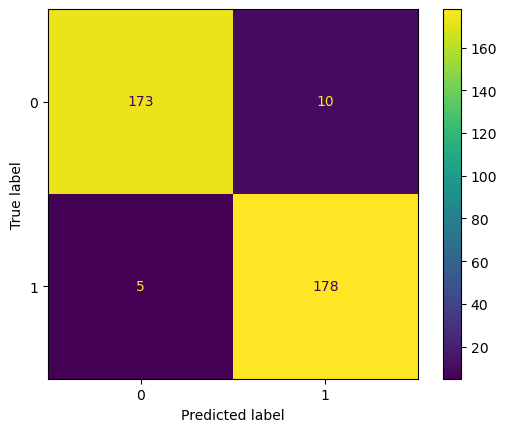

In [45]:
# Check Performance Model against Train-Set

y_pred_train_rf = rf_random_best.predict(x_train_balanced)

print('f1 Score - Train Set   : ', f1_score(y_train_balanced, y_pred_train_rf), '\n')
print('Classification Report : \n', classification_report(y_train_balanced, y_pred_train_rf), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_random_best, x_train_balanced, y_train_balanced))

f1 Score - Test Set   :  0.6666666666666666 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.80      0.82        20
           1       0.64      0.70      0.67        10

    accuracy                           0.77        30
   macro avg       0.74      0.75      0.74        30
weighted avg       0.77      0.77      0.77        30
 

Confusion Matrix      : 


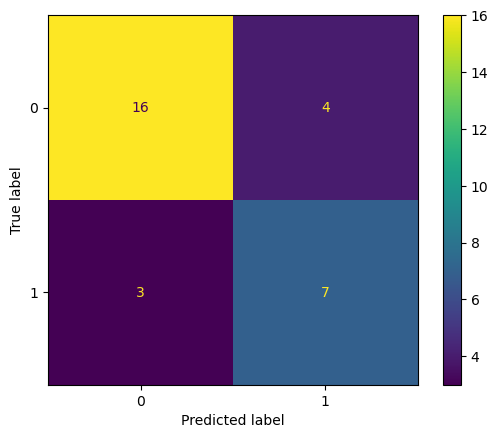

In [46]:
# Check Performance Model against Test-Set

y_pred_test_rf = rf_random_best.predict(x_test_final_df)

print('f1 Score - Test Set   : ', f1_score(y_test, y_pred_test_rf), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_rf), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_random_best, x_test_final_df, y_test))

In [47]:
# Save Classification Report into a Dictionary

all_reports = {}
score_reports = {
    'train - precision' : precision_score(y_train_balanced, y_pred_train_rf),
    'train - recall' : recall_score(y_train_balanced, y_pred_train_rf),
    'train - accuracy' : accuracy_score(y_train_balanced, y_pred_train_rf),
    'train - f1_score' : f1_score(y_train_balanced, y_pred_train_rf),
    'test - precision' : precision_score(y_test, y_pred_test_rf),
    'test - recall' : recall_score(y_test, y_pred_test_rf),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_rf),
    'test - f1_score' : f1_score(y_test, y_pred_test_rf),
}
all_reports['Random Forest'] = score_reports
pd.DataFrame(all_reports)

,Random Forest
test - accuracy_score,0.766667
test - f1_score,0.666667
test - precision,0.636364
test - recall,0.700000
train - accuracy,0.959016
train - f1_score,0.959569
train - precision,0.946809
train - recall,0.972678


f1 Score - Train Set   :  0.9010989010989011 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       183
           1       0.91      0.90      0.90       183

    accuracy                           0.90       366
   macro avg       0.90      0.90      0.90       366
weighted avg       0.90      0.90      0.90       366
 

Confusion Matrix      : 


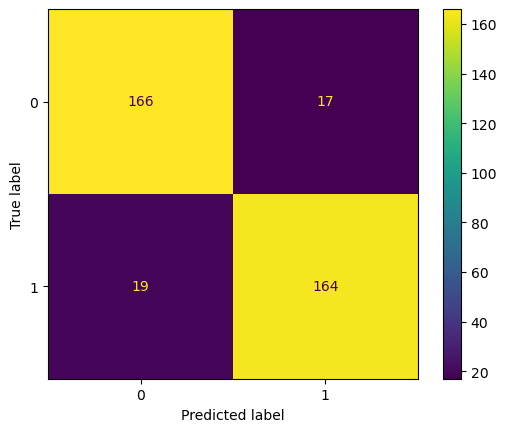

In [48]:
# Check Performance Model against Train-Set

y_pred_train_ada = ada_best.predict(x_train_balanced)

print('f1 Score - Train Set   : ', f1_score(y_train_balanced, y_pred_train_ada), '\n')
print('Classification Report : \n', classification_report(y_train_balanced, y_pred_train_ada), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(ada_best, x_train_balanced, y_train_balanced))

f1 Score - Train Set   :  0.6363636363636365 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.58      0.70      0.64        10

    accuracy                           0.73        30
   macro avg       0.71      0.72      0.71        30
weighted avg       0.75      0.73      0.74        30
 

Confusion Matrix      : 


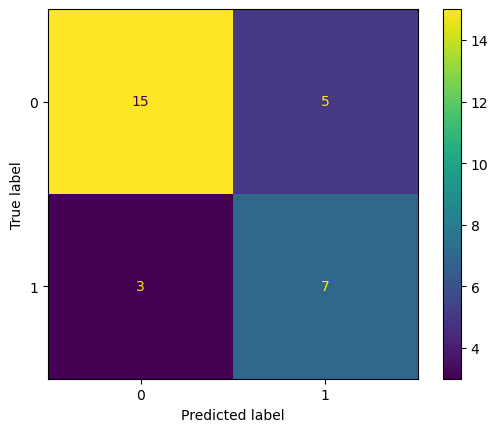

In [51]:
# Check Performance Model against Train-Set

y_pred_test_ada = ada_best.predict(x_test_final_df)

print('f1 Score - Train Set   : ', f1_score(y_test, y_pred_test_ada), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_ada), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(ada_best, x_test_final_df, y_test))

In [53]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train_balanced, y_pred_train_ada),
    'train - recall' : recall_score(y_train_balanced, y_pred_train_ada),
    'train - accuracy' : accuracy_score(y_train_balanced, y_pred_train_ada),
    'train - f1_score' : f1_score(y_train_balanced, y_pred_train_ada),
    'test - precision' : precision_score(y_test, y_pred_test_ada),
    'test - recall' : recall_score(y_test, y_pred_test_ada),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_ada),
    'test - f1_score' : f1_score(y_test, y_pred_test_ada),
}
all_reports['Adaboost Classifier'] = score_reports
pd.DataFrame(all_reports)

,Random Forest,Adaboost Classifier
train - precision,0.946809,0.906077
train - recall,0.972678,0.896175
train - accuracy,0.959016,0.901639
train - f1_score,0.959569,0.901099
test - precision,0.636364,0.583333
test - recall,0.700000,0.700000
test - accuracy_score,0.766667,0.733333
test - f1_score,0.666667,0.636364


# x. Conclusion

dari hasil pembuatan model diatas. kita mendapatkan kesimpulan bahwa :

1. dataset yang kita gunakan memiliki label imbalance pada target. jadi kita menangani hal tersebut dengan menggunakan SMOTE untuk membuat sample pada label `1` yang bernilai lebih sedikit dibanding `0`
2. RandomFOrest Classifier merupakan model terbaik yang kita gunakan menurut hasil recall dari cross validation
3. Dari hasil Classification report pada model setelah dilakukan Hyperparameter tuning, bahwa hasil dari train cukup baik. Namun, pada hasil test kurang baik pada precission yang berarti hanya 0,58 prediksi benar dari seluruh data
4. pada hasil recall, train mendapatkan hasil yang sangat bagus dan pada test hasil yang didapatkan cukup baik.
5. pada hasil f-1 score, train menunjukan hasil 0,99 yang berarti sangat baik, namun pada train mendapatkan score sekitar 0,70 yang berarti cukup baik dalam memprediksi

# xi. Conceptual Problem

### Question 1
1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !
### Answer 1
Bagging (bootstrap aggregating) pertama kali diperkenalkan oleh Breiman pada tahun 1996 sebagai sebuah metode ensemble learning yang menggunakan bootstrap resampling pada data training set. Ide utama dari bagging adalah membuat beberapa model yang berbeda dengan mengambil sampel secara acak (dengan penggantian) dari data training set, kemudian mempelajari masing-masing sampel tersebut menggunakan model yang sama, dan mengkombinasikan hasil prediksi dari masing-masing model.

Cara kerja bagging adalah sebagai berikut:

1. Membagi dataset training menjadi beberapa bagian yang sama besar secara acak.
2. Membuat model sederhana seperti decision tree, SVM, atau neural network pada masing-masing bagian tersebut.
3. Menggabungkan hasil prediksi dari setiap model menggunakan metode voting atau averaging untuk menghasilkan prediksi akhir.
4. Melakukan proses yang sama untuk dataset testing.

### Question 2
2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
### Answer 2
Perbedaan utama antara Random Forest dan AdaBoost terletak pada cara mereka membangun model prediksi:

- Random Forest membangun banyak pohon keputusan independen secara acak (random) dan kemudian menggabungkan hasil prediksi dari setiap pohon untuk membuat prediksi akhir. Setiap pohon memiliki subset acak fitur dan observasi dari data pelatihan, sehingga dapat menangani masalah overfitting yang sering terjadi pada pohon keputusan tunggal.

- AdaBoost, di sisi lain, membangun beberapa pohon keputusan secara berturut-turut. Setiap pohon dibangun dengan memberikan bobot lebih pada sampel yang salah klasifikasi pada langkah sebelumnya. Proses ini berlanjut hingga jumlah pohon yang ditentukan tercapai atau tidak ada perubahan yang signifikan dalam kinerja model.

Dalam hal keakuratan prediksi, keduanya dapat menghasilkan model yang sangat baik, tergantung pada jenis masalah yang dihadapi dan sifat dataset pelatihan. Namun, secara umum, Random Forest cenderung lebih cepat dan lebih mudah disesuaikan, sedangkan AdaBoost lebih dapat diandalkan dalam mengatasi masalah data yang tidak seimbang dan tugas klasifikasi multikelas.

# xii Model Saving

In [55]:
with open('model_scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)

with open('rf_best_model.pkl', 'wb') as file_2:
  pickle.dump(rf_random_best, file_2)

with open('list_num_col.txt', 'w') as file_3:
  file_3.write(str(num_col))

with open('list_cat_col.txt', 'w') as file_4:
  file_4.write(str(cat_col))

with open('boxcox.pkl', 'wb') as file_5:
  joblib.dump(box, file_5)